In [2]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


Лабораторная работа №3

In [2]:

# Написать генератор произвольной последовательности рукописных символов.

# ГЕНЕРАЦИЯ НАБОРА ДАННЫХ
# Сгенерировать набор текстовых строк из допустимых символов.
# Каждому набору поставить в соотвествие массив изоражений соответствующих символов.
# Добавить пробелы для разделения слов, символы пробелов не использовать во время классификации.

# КЛАССИФИКАЦИЯ (k ближайших соседей)
# Часть символов оставить для обучения классификатора . Остальные  классифицировать
# по аналогии с примером mnist с прошлого занятия. Т.е. преобразовывать изображение в вектор.
# Выбрать оптимальный классификатор в зависимости от k- количество соседей.
# Метрика для измерения точности классификации, и выбора оптимального классификатора относительно параметра k - accuracy.

# РАСПОЗНАВАНИЕ
# Итак, к данному этапу Вы из массива изображений "восстановили" текст.
# Случайно удалите некоторые символы,и случайно добавьте символы в результат распознавания.
# Рассчитайте метрику CER.


Генерация набора данных

1. Генерация набора текстовых строк из допустимых символов

In [3]:
images_folder = 'data'
output_folder = 'images'
count = 10
length = 10
original_strings = {}

allowed_char = os.listdir(images_folder)
print(f'Список допустимых символов: {allowed_char}')

def generate_string(length=10):
    characters = random.choices(allowed_char, k=length)
    generate_str = ''.join(characters)
    return generate_str

Список допустимых символов: ['(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'h', 't', 'w', 'X', 'y']


2. Сопоставление случайного изображения каждому сгенерированному сивмволу

In [4]:
def get_image(character):
    folder_path = os.path.join(images_folder, character)
    image_files = os.listdir(folder_path)
    random_image_file = random.choice(image_files)
    image_path = os.path.join(folder_path, random_image_file)
    image = Image.open(image_path)
    return image

Сгенерированная строка: 7)-81h0))-


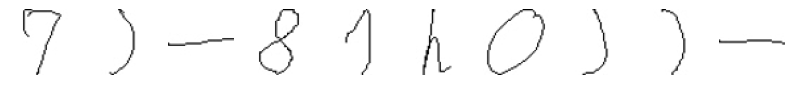

Сгенерированная строка: 7492X64(+)


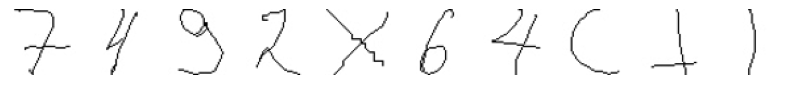

Сгенерированная строка: w97t,4)X)X


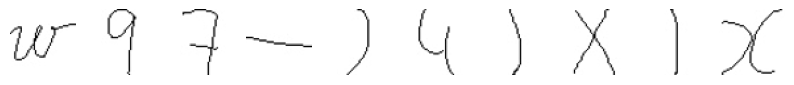

Сгенерированная строка: )02-8338+6


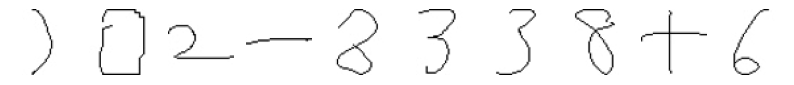

Сгенерированная строка: 88X)31y-y4


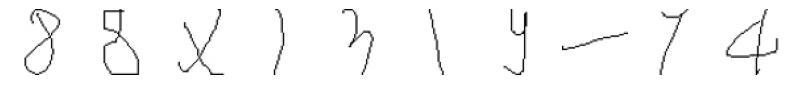

Сгенерированная строка: 213X)0((1t


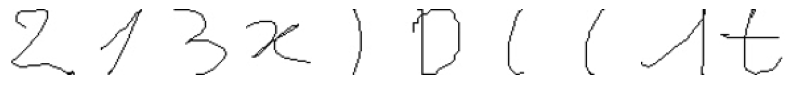

Сгенерированная строка: 8yy588(47X


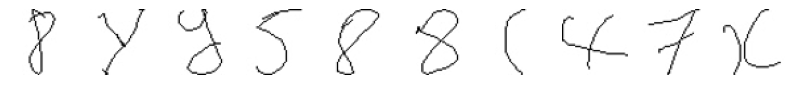

Сгенерированная строка: 88Xw+w8653


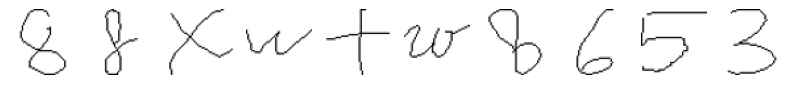

Сгенерированная строка: 2tty6,4t+(


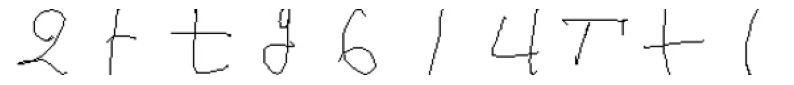

Сгенерированная строка: t(3-4-w041


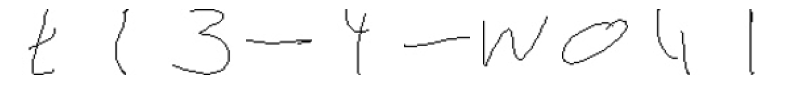

In [5]:
def generate_compare(generate_str, output_path, str_id):
    os.makedirs(output_path, exist_ok=True)
    images = []

    for i, char in enumerate(generate_str):
        image = get_image(char)
        images.append(image)
        image.save(os.path.join(output_path, f'{str_id}_pos_{i}.png'))
            
    _, ax = plt.subplots(1, len(images), figsize=(len(images), 2))
    for i, img in enumerate(images):
         img = img.resize((50, 50))
         ax[i].imshow(img, cmap='gray')
         ax[i].axis('off')
    plt.show()

for i in range(count):
    gen_str = generate_string(length)
    original_strings[i] = gen_str
    print("Сгенерированная строка:", gen_str)
    generate_compare(gen_str, output_folder, i)

Классификация(K ближайших соседей)

1. Поиск оптимального k

In [6]:
k_values = [x for x in range(1, 10)] 
count_img = 10000

def get_vector(image, size=(28, 28)):
    image = image.resize(size).convert('L')
    vector = np.array(image).flatten()
    return vector

X = []
y = []
for character in os.listdir(images_folder):
    folder_path = os.path.join(images_folder, character)
    image_files = os.listdir(folder_path)
    selected_files = random.sample(image_files, min(len(image_files), count_img))

    for image_file in selected_files:
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        vector = get_vector(image)
        X.append(vector)
        y.append(character)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

top_k = 0
top_acc = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy для k={k}: {accuracy: .4f}')
    
    if accuracy > top_acc:
        top_acc = accuracy
        top_k = k

print(f'Оптимальное значение k: {top_k} с точностью {top_acc:.4f}')

Accuracy для k=1:  0.9634
Accuracy для k=2:  0.9073
Accuracy для k=3:  0.8981
Accuracy для k=4:  0.8411
Accuracy для k=5:  0.8364
Accuracy для k=6:  0.8104
Accuracy для k=7:  0.8136
Accuracy для k=8:  0.7956
Accuracy для k=9:  0.7952
Оптимальное значение k: 1 с точностью 0.9634


2. Обучение классификатора с оптимальным значением k

In [7]:
model = KNeighborsClassifier(n_neighbors=top_k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Распознавание

1. Восстановление сгенерированных строк по сопоставленным изображениям

In [26]:
import pandas as pd
output_folder = "images"

string_images = {}
for name in os.listdir(output_folder):
    curr = name.split('_')
    str_id = int(curr[0])
    char_pos = int(curr[2].split('.')[0])
    path = os.path.join(output_folder, name)  
    if str_id not in string_images:
        string_images[str_id] = []
    string_images[str_id].append((char_pos, path))

def get_pred_strings(images, mdl):
    images.sort(key=lambda x: x[0])
    predict_str = ""
    
    for _, image_path in images:
        with Image.open(image_path) as image:
            vector = get_vector(image) 
            predicted_character = mdl.predict([vector])[0]
            predict_str += predicted_character
    
    return predict_str

pred_strings = {}
for str_id, images in string_images.items():
    pred_strings[str_id] = get_pred_strings(images, model)

def get_accuracy(original_strings, pred_strings):
    data = []
    for str_id, original_string in original_strings.items():
        correct_predictions = sum(1 for o, r in zip(original_string, pred_strings.get(str_id, "")) if o == r)
        total_characters = len(original_string)
        accuracy = correct_predictions / total_characters if total_characters > 0 else 0
        
        data.append({
            "Исходная строка": original_string,
            "Предсказанная строка": pred_strings.get(str_id, ""),
            "Accuracy": f"{accuracy:.4%}"
        })
    return pd.DataFrame(data)

print(pred_strings)
acc = get_accuracy(original_strings, pred_strings)
print(acc)

{0: '7)-81h0))-', 1: '7492X64(+)', 2: 'w97t,4)X)X', 3: ')02-8338+6', 4: '88,)31y-y4', 5: '213X)0((1t', 6: '8yy588(47X', 7: '88Xw+w8653', 8: '2tty6,4t+(', 9: 't(3-4-w041'}
  Исходная строка Предсказанная строка   Accuracy
0      7)-81h0))-           7)-81h0))-  100.0000%
1      7492X64(+)           7492X64(+)  100.0000%
2      w97t,4)X)X           w97t,4)X)X  100.0000%
3      )02-8338+6           )02-8338+6  100.0000%
4      88X)31y-y4           88,)31y-y4   90.0000%
5      213X)0((1t           213X)0((1t  100.0000%
6      8yy588(47X           8yy588(47X  100.0000%
7      88Xw+w8653           88Xw+w8653  100.0000%
8      2tty6,4t+(           2tty6,4t+(  100.0000%
9      t(3-4-w041           t(3-4-w041  100.0000%


Случайное удаление символов из строки

In [15]:
def delete_char(string, prob):
    new_string = "".join([char for char in string if random.random() > prob])
    return new_string

Случайное добавление символов в строку 

In [16]:
def add_char(string, prob, symbols="-,()+0123456789htwXy"):
    new_string = list(string)
    for i in range(len(string)):
        if random.random() < prob:
            random_char = random.choice(symbols)
            new_string.insert(i, random_char)
    return "".join(new_string)

Вычисление CER

In [17]:
def get_cer(original_string, predicted_string):
    errors_char = sum(1 for orig, pred in zip(original_string, predicted_string) if orig != pred)
    errors_char += abs(len(original_string) - len(predicted_string))
    return errors_char / len(original_string) if len(original_string) > 0 else 0 

In [20]:
all_cer = 0 
errors_strings = []
for str_id, predict_str in pred_strings.items():
    modif_str = delete_char(predict_str, prob=0.2)
    modif_str = add_char(modif_str, prob=0.1)

    orig_str = original_strings[str_id]
    curr_cer = get_cer(orig_str, modif_str)
    all_cer += curr_cer  
    
    errors_strings.append({
        'Оригинальная строка': orig_str,
        'Измененная строка': modif_str,
        'CER': curr_cer
    })

avg_cer = all_cer / count if count > 0 else 0
df = pd.DataFrame(errors_strings)
print(df)
print(f"Среднее значение CER: {avg_cer:.4f}")

  Оригинальная строка Измененная строка  CER
0          7)-81h0))-          7)-1h))-  0.7
1          7492X64(+)            92X6()  1.0
2          w97t,4)X)X          w97t,4)X  0.2
3          )02-8338+6        )02y-833+6  0.4
4          88X)31y-y4        88,)31y-y4  0.1
5          213X)0((1t           13X)(1t  1.0
6          8yy588(47X           8yy88(X  0.6
7          88Xw+w8653          8Xww86,5  0.8
8          2tty6,4t+(          ty6,4t+(  1.0
9          t(3-4-w041         t(h3--w01  0.5
Среднее значение CER: 0.6300
